# Linear Regression Models Comparison

**Name:** Janmejay Mohanty  
**University:** Stevens Institute of Technology  
**Course Name:** Machine Learning Fundamentals And Applications  
**Course Code:** CS-559-B  
**CWID:** 20009315  
**Date:** 12/13/2023

In [42]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [43]:
save_directory = 'Results/'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

Reading the Energy Efficiency Excel Dataset (ENB2012_data.xlsx)

In [44]:
df = pd.read_excel('ENB2012_data.xlsx', sheet_name='Φύλλο1',engine= 'openpyxl')       # openpyxl use for supporting newer version of excel file

In [45]:
# Extracting features and target
X = df.drop(columns=['Y1','Y2'])  # Features
y = df['Y2']  # Target variable

In [46]:
# Models
lasso = Lasso()
ridge = Ridge()
elastic_net = ElasticNet()

models = {'Lasso': lasso, 'Ridge': ridge, 'ElasticNet': elastic_net}

In [47]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [49]:
results = {'Model': [], 'Mean Squared Error': []}
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    mse_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=kf)
    mse_mean = -mse_scores.mean()
    results['Model'].append(name)
    results['Mean Squared Error'].append(mse_mean)
    print(f"{name} MSE: {mse_mean:.4f}")

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

Lasso MSE: 13.6273
Ridge MSE: 10.3339
ElasticNet MSE: 18.1189


In [50]:
df_results

,Model,Mean Squared Error
0,Lasso,13.627329
1,Ridge,10.333851
2,ElasticNet,18.118905


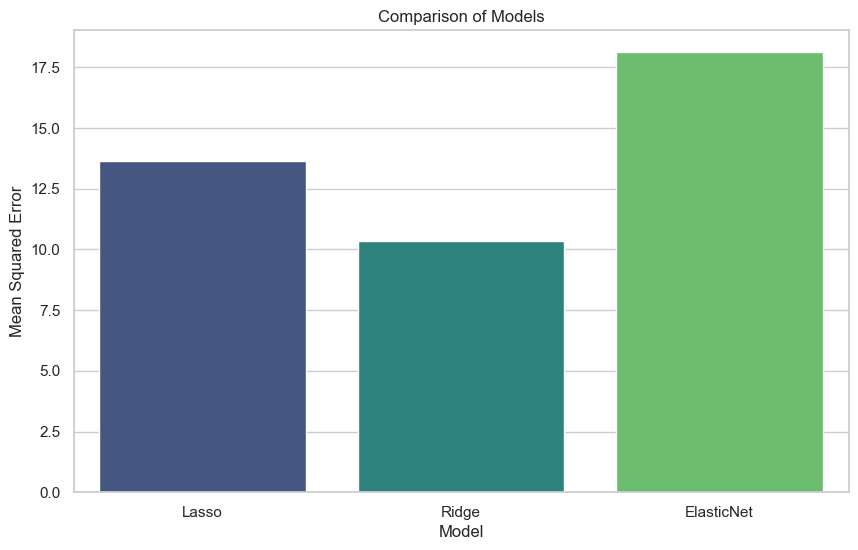

In [51]:
# Set seaborn style
sns.set(style="whitegrid")

# Plotting the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean Squared Error', data=df_results, palette="viridis", hue='Model', dodge=False)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Models')
plt.savefig(os.path.join(save_directory, 'models_comparision.png'), bbox_inches='tight')
plt.show()

As we can see, using the 5-fold cross validation to compare model performance based on mean 
squared error (MSE), the Ridge regression model has the lowest mean squared error value. This 
implies that it is the best model to predict the cooling load using the given dataset.